In [1]:
import pandas as pd
import numpy as np

csv_path  = '../resources/flood_images_annot.csv'

In [2]:
df = pd.read_csv(csv_path, parse_dates=['datetime'], index_col=0)
df['level'] = pd.to_numeric(df['level'])
df[df['level']==5] = np.nan

In [10]:
df_clean = df[df['level']!=0]
mask = df_clean['place'].isna()
df_clean.loc[mask, 'place'] = 'unknown'
df_clean = df_clean[ df_clean['place'].str.contains('SHOP') ]

print(df_clean['level'].value_counts(normalize=False))
print(df_clean['level'].value_counts(normalize=True))

1.0    67803
2.0      535
3.0      186
4.0       75
Name: level, dtype: int64
1.0    0.988396
2.0    0.007799
3.0    0.002711
4.0    0.001093
Name: level, dtype: float64


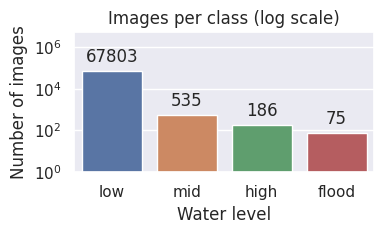

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

fig, ax = plt.subplots(1, figsize=(4,2.5))
sns.countplot(ax=ax, x='level', data=df_clean)
ax.set_yscale('log')
ax.set_ylim((1,5e6))
ax.set_xticklabels(['low','mid','high','flood'])
ax.set_xlabel('Water level')
ax.set_ylabel('Number of images')
ax.set_title('Images per class (log scale)')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

fig.tight_layout()
fig.savefig('class_images.pdf')

plt.show()

In [12]:
df_shop = df_clean[df_clean['place'].str.contains('SHOP')]

print(df_shop['level'].value_counts(normalize=True))

1.0    0.988396
2.0    0.007799
3.0    0.002711
4.0    0.001093
Name: level, dtype: float64
